<a href="https://colab.research.google.com/github/gouravreddy02/Biomarker-concentration-in-biosensor/blob/main/Linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [ ]:
Conc = pd.read_csv('Conc.csv')

In [ ]:
Conc.head

<bound method NDFrame.head of     concentration  average_current
0              50         2.460000
1             100         2.925000
2             150         3.176667
3             200         3.760000
4             250         3.590000
5             300         3.913333
6             350         4.216667
7             400         4.563333
8             450         4.820000
9             500         4.846667
10            550         5.320000
11            600         5.553333
12            650         5.443333
13            700         5.520000
14            750         5.653333
15            800         6.433333
16            850         6.636667
17            900         6.886667
18            950         6.706667
19           1000         6.606667>

#Linear regression


In [ ]:
Conc.shape

(20, 2)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='average_current', ylabel='concentration'>

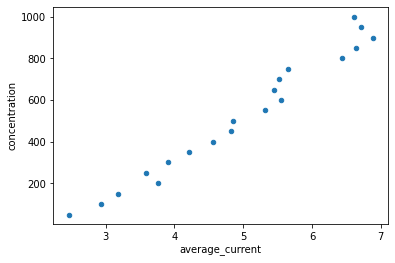

In [ ]:
Conc.plot.scatter ("average_current","concentration")

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Conc.average_current, Conc.concentration, test_size = 0.2)

In [ ]:
regr = LinearRegression()

In [ ]:
regr.fit(np.array(x_train).reshape(-1,1), y_train)

LinearRegression()

In [ ]:
preds = regr.predict(np.array(x_test).reshape(-1,1))

In [ ]:
x_train=np.array(x_train).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)

In [ ]:
y_test.head()


16    850
8     450
13    700
4     250
Name: concentration, dtype: int64

In [ ]:
preds


array([892.48408313, 497.34054861, 649.59769032, 229.80299959])

In [ ]:
regr.predict([[6]])

array([754.0025875])

#Root mean square error and R square

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,preds))


In [ ]:
rmse

41.816074984642526

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y_test.head(),preds)


In [ ]:
r2


0.9669883822608378

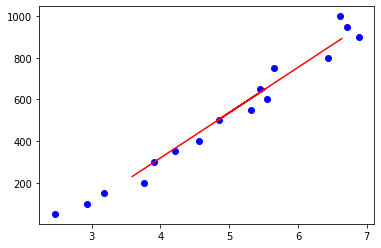

In [ ]:
plt.plot(x_test,preds,color='red')
plt.scatter(x_train,y_train,color='blue')


#Using K-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
#scores = cross_val_score(regr, x_train, y_train, scoring='r2', cv=folds)
#scores

k = 4
k_fold = KFold(n_splits = k, random_state = None)

score = cross_val_score(regr,x_train, y_train, scoring='r2',cv = k_fold)
score


array([0.93479702, 0.97833481, 0.89855982, 0.96419374])

In [ ]:
print("Mean of Accuracies: {:.2f}" .format(score.mean()))
print("Standard deviation: {:.2f}" .format(score.std()))

Mean of Accuracies: 0.94
Standard deviation: 0.03
